<h2><font color="#07bdf5">1.Import the necessary libraries</font></h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from scipy.stats import zscore
from sklearn.metrics import confusion_matrix


<h2><font color="#07bdf5">2.Read the data as a data frame</font></h2>

In [2]:
bank_df=pd.read_csv("./bank-full.csv")

In [3]:
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


<font color="07bdf5" style="font-family:courier;font-size:24px;">Observation:DataFrame loaded</font>

<h2><font color="#07bdf5">3.EDA - Exploratory Data Analytics</font></h2>

In [4]:
bank_df.shape

(45211, 17)

<font color="07bdf5" style="font-family:courier;font-size:24px;">Observation:The given dataset contains 45,211 observation and 17 attributes</font>

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Check for missing value
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
bank_df["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [8]:
#pout column contains value 'unknown' let us verify the count
bank_df.groupby(bank_df["poutcome"]).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,Target
poutcome,,,,,,,,,,,,,,,,
failure,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901
other,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840
success,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511
unknown,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959


Other and unknown may not make much difference 

In [9]:
#ssimilarly contact column contains values 'unknown'
bank_df.groupby(bank_df["contact"]).count()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
contact,,,,,,,,,,,,,,,,
cellular,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285
telephone,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906
unknown,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020


In [10]:
bank_df.groupby(bank_df["Target"]).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [11]:
#unknown values are roughly 37K the results are gouing to be influnced by unknown however let us verify once


<font color="#07bdf5" style="font-family:courier;font-size:24px;">Observation:No missing data</font>
<font color="#07bdf5" style="font-family:courier;font-size:16px;">
<ul>
    <li><u>Numeric (Integer) attributes:</u> 7 and they are age, balance, day, duration, campaign, pdays, previous </li>
    <li><u>Object attributes:</u> 10 and they are job, marital, education, default, housing, loan, contact, month, poutcome, Target</li>
</ul>
    </font>

In [12]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


<font color="#07bdf5" style="font-family:courier;font-size:24px;">Observation: described for all numeric data</font>
<font color="#07bdf5" style="font-family:courier;font-size:16px;">
<ul>
    <li>found negative values in balance</li>
    <li>found negative value -1 in pdays</li>
    <li>Strange values found in attribute called "previous" which denotes number of contacts performed all min, first quartile, second quartile, and 3rd quartile all are zero only max is 275. Possible outlier? </li>
    <li>attribute Age: minum age is 18 and maximum age is 95. 75% of age between 18 and 48, 48 to 95 Possible outlier. Mean age is approximately 41 mode is 39, normally distributed slightly right skewed</li>
    <li>Month Column is not included as it is define as object type and contains text as May, Apr, etc</li>
    <li>balance and duration columns are having lot of outliers</li>
</ul>
    </font>

In [13]:
#convert month to integer/ numeric type
#taking a copy of data frame
bank_df2 = bank_df.copy()
import calendar 
#applying change in 
bank_df2["month"] = bank_df2["month"].apply(lambda x: list(calendar.month_abbr).index(x.capitalize()))
bank_df2.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,5,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,5,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,5,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,5,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,5,55,1,-1,0,unknown,no


In [14]:
#target variable target count
print("Total rows:",bank_df.shape[0],"and target variable")
print(bank_df.groupby(bank_df["Target"]).count()["age"]) #not printing all 17 counmns in count just takin age column

Total rows: 45211 and target variable
Target
no     39922
yes     5289
Name: age, dtype: int64


In [15]:
bank_df['Target'].unique() #just to re confirm only 'yes' and 'no' are the values and not any Yes, NO values

array(['no', 'yes'], dtype=object)

In [16]:
#changing yes and no as 1 and zero, i.e., yes=1 and no=0
bank_df2["Target"] = bank_df2["Target"].apply(lambda x: 1 if x=='yes' else 0)
bank_df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


In [17]:
#sns.pairplot(bank_df2) #this pair plot takes time

<font color="#07bdf5">Observation : 
<ol>
    <li>Age is almost normally distributed</li>
    <li>Month and campaign shows some correlation few months, during Jay, Jun, Jyl & August the bank runs more campains</li>
    <li>Month and day are showing similar patterns as the represents same dimension</li>
    </ol>
</font>

Number of observations, where duration of the call exceding 319 seconds (third quartile)  11261


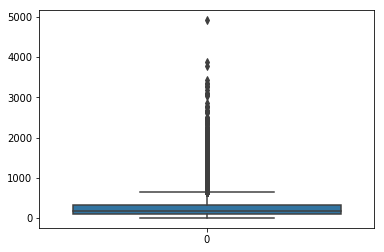

In [18]:
sns.boxplot(data=bank_df2["duration"])
durationoutliers_df = bank_df2.apply(lambda x: True if x['duration'] > 319 else False , axis=1)
durationoutliers = len(durationoutliers_df[durationoutliers_df == True].index)
print('Number of observations, where duration of the call exceding 319 seconds (third quartile) ',durationoutliers)

Observation: Duration with max 4918 seconds, mean 258 showing left skewed, meaning most of the calls duration in the calls are 103 to 319 seconds. 
11,261 calls are in the range of 320 to 4918 seconds

Number of observations, where customer is contacted more than 3 times (third quartile)  9641


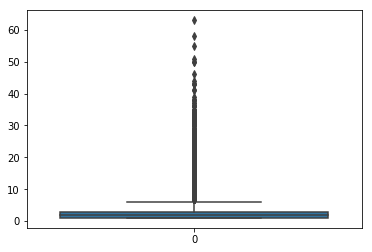

In [19]:
sns.boxplot(data=bank_df2["campaign"])
campaignoutliers_df = bank_df2.apply(lambda x: True if x['campaign'] > 3 else False , axis=1)
campaignoutliers = len(campaignoutliers_df[campaignoutliers_df == True].index)
print('Number of observations, where customer is contacted more than 3 times (third quartile) ',campaignoutliers)

Text(0, 0.5, 'Duration of the call')

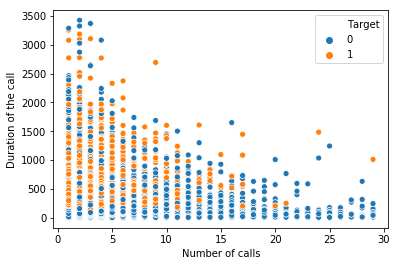

In [20]:
bank_call_df=bank_df2[["campaign","Target","duration"]]
bank_call_df = bank_call_df[(bank_call_df["duration"]<3600) & (bank_call_df["campaign"]<30)]
graph = sns.scatterplot(x=bank_call_df["campaign"], y=bank_call_df["duration"], hue=bank_call_df["Target"])
# Set x-axis label
plt.xlabel('Number of calls')
# Set y-axis label
plt.ylabel('Duration of the call')

Inference: Most of the result either Success or Failure obtained in 2 to 5 follow up calls. And results are obtained when call duration is less than 1000 seconds

In [21]:
 corr = bank_df2.corr()

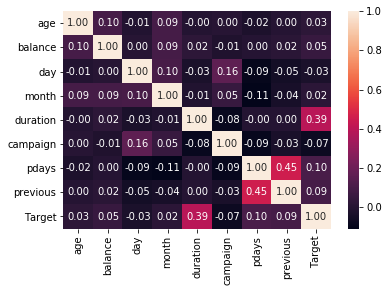

In [22]:
sns.heatmap(corr,  annot=True, fmt='0.2f')

As seen in pair plot, there is no high correlation among age, balance, day, month, duration, campaign, pdays, previous and Target <br>
comparitively duration of the call shows some correlation with the result <br>
Pdays and pdays both represents same dimension, hence they are correlated, meaning if customer is contated more than one time then it will have pdays(which is number of days that passed by after the client
was last contacted from a previous campaign) value<br>
<font color="blue">Next step let us do some, isual analysis of categorical data </font>

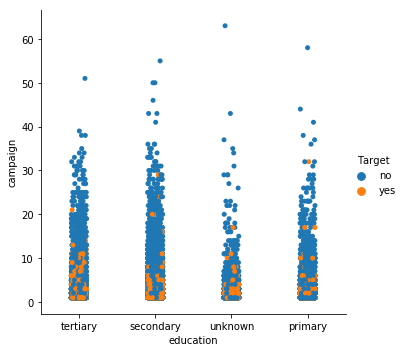

In [23]:
sns.catplot(y="campaign", x="education",hue="Target", data=bank_df)

Inference : 
Number of term deposit subscribtions are comparitively more than persons with Tertiary and secondary education level rather than primary and unknown <br>
Also they decide with in 10 follow up calls, making more than 10 follow up calls rarely results in subcription of Term deposit


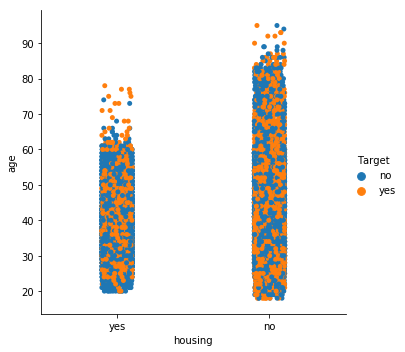

In [24]:
sns.catplot(y="age", x="housing",hue="Target", data=bank_df)

In [25]:
#Found housing,default and loan also of yes and no type making them also numeric data, i.e., yes =1 and no=0
bank_df3 = bank_df2.copy()
bank_df3["housing"] = bank_df3["housing"].apply(lambda x: 1 if x=='yes' else 0)
bank_df3["loan"] = bank_df3["loan"].apply(lambda x: 1 if x=='yes' else 0)
bank_df3["default"] = bank_df3["default"].apply(lambda x: 1 if x=='yes' else 0)
bank_df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


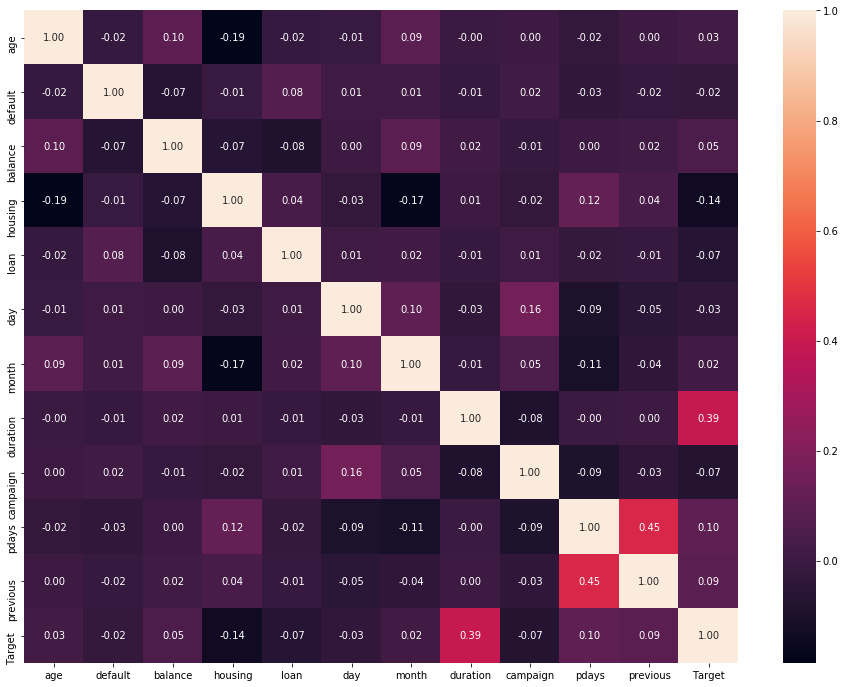

In [26]:
corr2 = bank_df3.corr()
import pylab as pl
pl.figure(figsize = (16,12))
sns.heatmap(corr2, annot=True, fmt='0.2f')

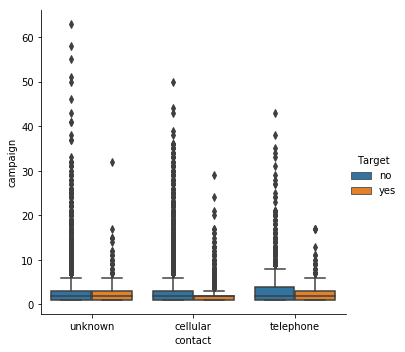

In [27]:
sns.catplot(y="campaign", x="contact",hue="Target", kind="box", data=bank_df)

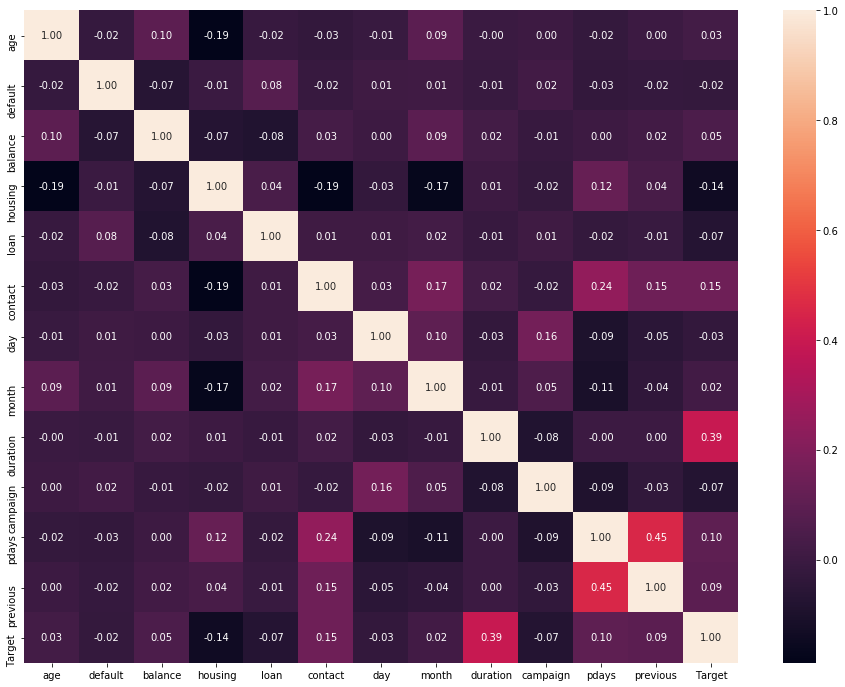

In [28]:
bank_df4=bank_df3.copy()
bank_df4["contact"] = bank_df["contact"].apply(lambda x: 1 if x=="telephone" else 2 if x=="cellular" else 0)
pl.figure(figsize = (16,12))
sns.heatmap(bank_df4.corr(), annot=True, fmt='0.2f')
#sns.boxplot(temp_contact["contact"])

1362.2720576850766

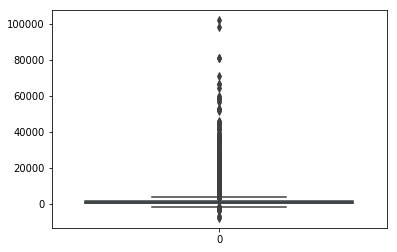

In [29]:
#From 5 point analysis - balance and duration columns are having lot of out liers
sns.boxplot(data=bank_df4["balance"])
bank_df4["balance"].mean()

In [30]:

bank_df4['balance_outliers'] = bank_df4['balance']
bank_df4['balance_outliers']= zscore(bank_df4['balance_outliers'])
print(bank_df4.shape[0], "total rows reduced to ", len(bank_df4['balance_outliers'].unique())," after applying scaling with zscore")
#removing +/-3 standard deviation from the mean in balance column
balance_constraint = (bank_df4['balance_outliers']>3) | (bank_df4['balance_outliers']<-3 )
bank_df5 = bank_df4.drop(bank_df4[balance_constraint].index, axis = 0, inplace = False)
print("Number of rows in new dataset",bank_df5.shape[0], "and ", bank_df4.shape[0]-bank_df5.shape[0]," rows got reduced")

45211 total rows reduced to  7168  after applying scaling with zscore
Number of rows in new dataset 44466 and  745  rows got reduced


In [31]:

bank_df5['duration_outliers'] = bank_df5['duration']
bank_df5['duration_outliers']= zscore(bank_df5['duration_outliers'])
print(bank_df4.shape[0], "total rows reduced to ", len(bank_df5['duration_outliers'].unique())," after applying scaling with zscore")
#removing +/-3 standard deviation from the mean in balance column
duration_constraint = (bank_df5['duration_outliers']>3) | (bank_df5['duration_outliers']<-3 )
bank_df5 = bank_df5.drop(bank_df5[duration_constraint].index, axis = 0, inplace = False)
print("Number of rows in new dataset",bank_df5.shape[0], "and ", bank_df4.shape[0]-bank_df5.shape[0]," rows got reduced")

45211 total rows reduced to  1568  after applying scaling with zscore
Number of rows in new dataset 43524 and  1687  rows got reduced


In [32]:
print("Original shape: ",bank_df.shape," and shape now",bank_df5.shape, " Difference : ",bank_df.shape[0]-bank_df5.shape[0])

Original shape:  (45211, 17)  and shape now (43524, 19)  Difference :  1687


In [33]:
#Removing newly added columns duration_outliers and balance_outliers
bank_df6 = bank_df5.drop("balance_outliers", axis=1)
bank_df6 = bank_df6.drop("duration_outliers", axis=1)
bank_df6.shape

(43524, 17)

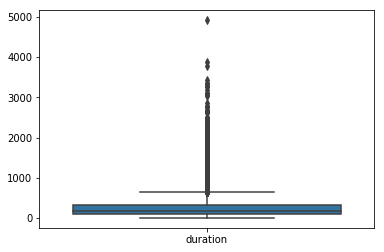

In [34]:
sns.boxplot(data=bank_df2[["duration"]])

233.80498115981987

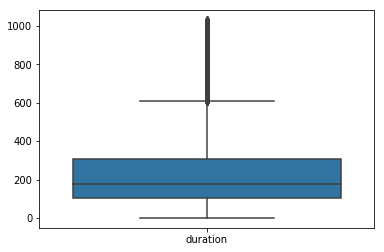

In [35]:
sns.boxplot(data=bank_df6[["duration"]])
bank_df6["duration"].mean()

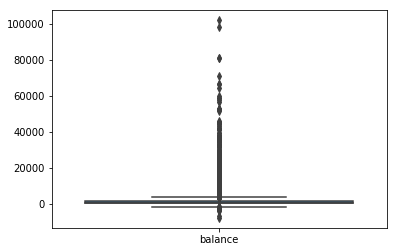

In [36]:
sns.boxplot(data=bank_df2[["balance"]])

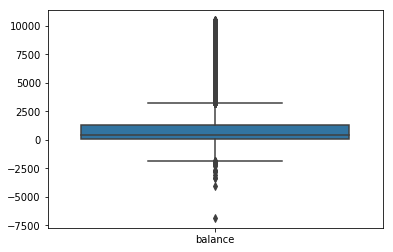

In [37]:
sns.boxplot(data=bank_df6[["balance"]])

Verify with bank whether NEGATIVE balance is valid values

Since machine learning algorithms only take numerical values, remaining categorical variables (job, education, marital, and poutcome) are transformed into dummy variables.

In [38]:
bank_df7=bank_df6.copy()

In [39]:
np.argmin(bank_df7.applymap(np.isreal).all(0))
job_values = bank_df6["job"].unique().tolist()
job_values[3]

/Users/thiru/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


'blue-collar'

In [40]:
#bank_df7 = pd.get_dummies(bank_df6, columns = ['job'])
bank_df7["marital"] = bank_df7["marital"].apply(lambda x: 1 if x=="married" else 2 if x=="single" else 0)
bank_df7["education"] = bank_df7["education"].apply(lambda x: 1 if x=="primary" else 2 if x=="secondary" else 3 if x=="tertiary" else 0)
bank_df7["poutcome"] = bank_df7["poutcome"].apply(lambda x: 1 if x=="success" else 2 if x=="failure" else 3 if x=="other" else 0)
bank_df7["job"] = bank_df6["job"].apply(lambda x: job_values.index(x) )
bank_df7.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,0,1,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,1,2,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,2,1,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,3,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,4,2,0,0,1,0,0,0,5,5,198,1,-1,0,0,0
5,35,0,1,3,0,231,1,0,0,5,5,139,1,-1,0,0,0
6,28,0,2,3,0,447,1,1,0,5,5,217,1,-1,0,0,0
7,42,2,0,3,1,2,1,0,0,5,5,380,1,-1,0,0,0
8,58,5,1,1,0,121,1,0,0,5,5,50,1,-1,0,0,0
9,43,1,2,2,0,593,1,0,0,5,5,55,1,-1,0,0,0


<h2><font color="#07bdf5">4.Model Creation (Basic classification Models)</font></h2>

In [41]:
#splitting training and testing data
X_train, X_test = train_test_split(bank_df7 , test_size=0.3, random_state=1)
y_train = X_train.pop("Target")
y_test = X_test.pop("Target")
modelscorecard={} #defining a dictionary to comparing different model

In [42]:
def do_LR(X_trainLR,y_trainLR,X_testLR,y_testLR):
    clf = LogisticRegression(fit_intercept = False, C = 1e9) 
    #scikit-learn's logistic regression performs regularization by default. To negate setting high value for C
    clf.fit(X_trainLR,y_trainLR) #Model
    y_pred = clf.predict(X_testLR) #prediction
    scikit_score = clf.score(X_testLR,y_testLR)
    return scikit_score,y_pred

In [43]:
from sklearn import metrics
def draw_conmmat( actual, predicted, modelname): #creating this as function as I am planning to reuse
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Subscribed Term Deposit", "NOT Subscribed Term Deposit"] , yticklabels = ["Subscribed Term Deposit", "NOTSubscribed Term Deposit"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label - '+str(modelname))
    plt.show()

In [44]:
LRScore, LRpred_labels = do_LR(X_train,y_train,X_test,y_test)
print("Score scikit learn Logistic Regression : "+str(LRScore))
modelscorecard["LRscikitlearn"]=LRScore

/Users/thiru/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score scikit learn Logistic Regression : 0.8940113340480931


In [45]:
confusion_matrix(y_test,LRpred_labels)

array([[11411,   256],
       [ 1128,   263]])

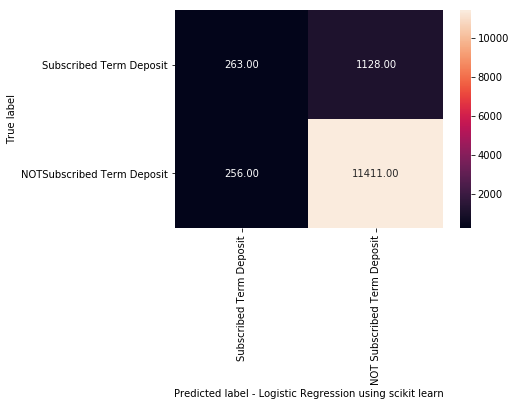

In [46]:
draw_conmmat(y_test,LRpred_labels, "Logistic Regression using scikit learn")

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LRpred_labels))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11667
           1       0.51      0.19      0.28      1391

   micro avg       0.89      0.89      0.89     13058
   macro avg       0.71      0.58      0.61     13058
weighted avg       0.87      0.89      0.87     13058




<font color="blue"><b>KNN</b></font>


In [48]:
def calculate_accuracy(confusion_matrix):
    accuracy = (confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
    return accuracy

In [49]:
from sklearn.neighbors import KNeighborsClassifier

def do_KNN(X_train,y_train,y_test, K_value): #defining this as function as I have to reuse
    NNH = KNeighborsClassifier(n_neighbors= K_value , weights = 'uniform', metric='euclidean' )
    NNH.fit(X_train, y_train)
    # For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
    # be assigned to the test data point
    KNNpredict = NNH.predict(X_test)
    score = NNH.score(X_test, y_test)
    return score,KNNpredict

In [50]:

for i in range(1,21):
    KNNscore,KNNpredict = do_KNN(X_train,y_train,y_test,i)# applying K values from 1 to 20
    print("When K value is "+str(i)+" score = "+str(KNNscore))

When K value is 1 score = 0.8599326083626896
When K value is 2 score = 0.8912544034308469
When K value is 3 score = 0.8826007045489355
When K value is 4 score = 0.8933986827998162
When K value is 5 score = 0.8914075662429162
When K value is 6 score = 0.8933986827998162
When K value is 7 score = 0.8933221013937815
When K value is 8 score = 0.8945474038903354
When K value is 9 score = 0.8933221013937815
When K value is 10 score = 0.89462398529637
When K value is 11 score = 0.8940113340480931
When K value is 12 score = 0.8928626129575739
When K value is 13 score = 0.8933986827998162
When K value is 14 score = 0.8930157757696431
When K value is 15 score = 0.8940879154541277
When K value is 16 score = 0.8940113340480931
When K value is 17 score = 0.8917138918670546
When K value is 18 score = 0.8937050084239546
When K value is 19 score = 0.8943942410782662
When K value is 20 score = 0.8939347526420585



<font color="blue"> When K value is 2 the score is 89.13%, 89.4 is obtained when K is 8, since it is not major improvement, assuming 2 as Optimum K value</font>


In [51]:
# applying K value as 2
optimum_kvalue = 2
KNNscore,KNNpredict = do_KNN(X_train,y_train,y_test,optimum_kvalue)
print("When K value is "+str(optimum_kvalue)+" score = "+str(KNNscore))
print("Confusion matrix for KNN is")
conf_matrix= confusion_matrix(y_test,KNNpredict)
modelscorecard["KNN"] = KNNscore

When K value is 2 score = 0.8912544034308469
Confusion matrix for KNN is


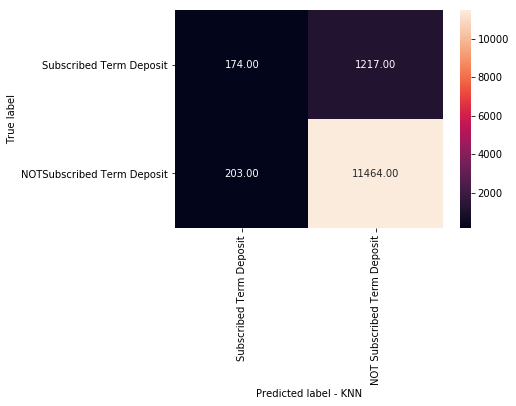

In [52]:
draw_conmmat(y_test,KNNpredict,"KNN")

In [53]:
calculate_accuracy(conf_matrix)

acc_knn=(174+11465)/(174+11465+202+1217) #Just to verify through manual calculation
print("KNN Accuracy="+str(acc_knn))


KNN Accuracy=0.8913309848368816


In [54]:
print(classification_report(y_test, KNNpredict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11667
           1       0.46      0.13      0.20      1391

   micro avg       0.89      0.89      0.89     13058
   macro avg       0.68      0.55      0.57     13058
weighted avg       0.86      0.89      0.86     13058



<font color="blue"><b>Naïve Bayes</b></font>


In [55]:

from sklearn.naive_bayes import GaussianNB 

def do_naive_bayes(X_trainNB,y_trainNB,X_testNB,y_testNB):
    
    naive_model = GaussianNB()
    naive_model.fit(X_trainNB, y_trainNB)

    NBpredict = naive_model.predict(X_testNB)
    NBscore = naive_model.score(X_testNB,y_testNB)
    return NBscore,NBpredict

In [56]:
NBscore, NBpredicted_labels = do_naive_bayes(X_train,y_train,X_test,y_test)
print("Score in Naive Bayes : ",NBscore)
modelscorecard["Naive Bayes"]=NBscore

print("Confusion matrix for Naive Bayes : ")
print(y_test.shape,"\n\n",NBpredicted_labels.shape)
#con_matrix = confusion_matrix(y_test.tolist(), NBpredicted_labels.tolist())

Score in Naive Bayes :  0.8324398835962629
Confusion matrix for Naive Bayes : 
(13058,) 

 (13058,)


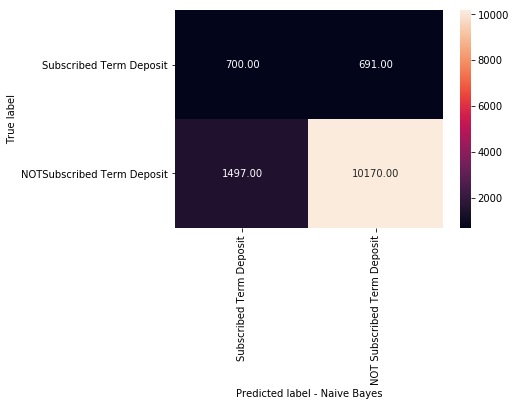

In [57]:
draw_conmmat(y_test,NBpredicted_labels,"Naive Bayes")

In [58]:
print(classification_report(y_test, NBpredicted_labels))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90     11667
           1       0.32      0.50      0.39      1391

   micro avg       0.83      0.83      0.83     13058
   macro avg       0.63      0.69      0.65     13058
weighted avg       0.87      0.83      0.85     13058



<font color="blue"><b>Comparing basic models</b></font>

In [59]:
modelscorecard

{'LRscikitlearn': 0.8940113340480931,
 'KNN': 0.8912544034308469,
 'Naive Bayes': 0.8324398835962629}

<font color="blue">
Lst us consider F1 score as well - as the dataset is more biased towards Not subscribed observations</font><br>
F1 = 2 * (precision * recall) / (precision + recall)

In [60]:
from sklearn.metrics import f1_score
models_df=pd.DataFrame(columns=['Model', 'Accuracy', 'F1Score'])
models_df["Model"] = modelscorecard.keys()
models_df["Accuracy"] = modelscorecard.values()


In [61]:
models_df

,Model,Accuracy,F1Score
0,LRscikitlearn,0.894011,NaN
1,KNN,0.891254,NaN
2,Naive Bayes,0.832440,NaN


In [62]:
models_df["F1Score"][0] = f1_score(y_test,LRpred_labels)
models_df["F1Score"][1] = f1_score(y_test,KNNpredict)
models_df["F1Score"][2] = f1_score(y_test,NBpredicted_labels)
#models_df["F1Score"].iloc[:0] = f1_score(y_test,LRpred_labels)

/Users/thiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/thiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/thiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports u

<h2><font color="#07bdf5">Basic Models Comparison</font></h2>

In [63]:
models_df

,Model,Accuracy,F1Score
0,LRscikitlearn,0.894011,0.275393
1,KNN,0.891254,0.196833
2,Naive Bayes,0.832440,0.39019


<h2><font color="#07bdf5">5.Model creation with Ensemble Techniques</font></h2>

<font color="blue"><b>Iteration 2</b></font><br>


<font color="blue"><p>
    Accuracy of a model = (TP+TN) / (TP+FN+FP+TN)<br>
    From our analysis work so far, clearly indicating that the domain is with  imbalanced accuracy is not an appropriate measure to evaluate model performance
    </p>
</font>

In [64]:
target_df = bank_df.groupby(bank_df["Target"]).count()["age"]
yescount=target_df["yes"]
nocount=target_df["no"]
print("total observations : ",bank_df.shape[0],"\nScbscribed : ",yescount,"\nNot Subscribed : ",nocount)
yes_percent = target_df["yes"]/bank_df.shape[0]*100
no_percent = target_df["no"]/bank_df.shape[0]*100
print("Percentage of Subscribed:",yes_percent.round(2),"%")
print("Percentage of Not Subscribed:",no_percent.round(2),"%")

total observations :  45211 
Scbscribed :  5289 
Not Subscribed :  39922
Percentage of Subscribed: 11.7 %
Percentage of Not Subscribed: 88.3 %


Total Observations : 45211
Subscribed   Observations : 5289
Not Subscribed Observations : 39922
Percentage of Subscribed: 11.7 %

It is the clear case of imbalanced sampling. To handle imbalanced sampling, either we can use SMOTE techniques where resampling original data to provide balanced classes.
Alternatively algorithem based approaches called as <font color="blue">Ensemble Techniques,</font> where <font color="red">modifying existing classification algorithms to make them appropriate for imbalanced data sets</font>.
    <img src="./ETimg.png"></img>

Here we are about to test Bagging, Adaboost, and Gradient boost algorithms.


<font color="blue"><b>Random Forest</b></font>

In [65]:
from sklearn.ensemble import RandomForestClassifier
def do_randomforest(X_trainRF,y_trainRF,X_testRF,y_testRF, nsti=20, criterion="entropy", w1=0.5,w2=1, maxdepth=10,minleaf=5):
    rfcl = RandomForestClassifier(random_state=0, criterion = 'entropy',n_estimators=nsti, class_weight={0:w1,1:w2}, max_depth = maxdepth, min_samples_leaf=minleaf)
    rfcl = rfcl.fit(X_trainRF, y_trainRF)
    RFpredict = rfcl.predict(X_testRF)
    RFscore = rfcl.score(X_testRF , y_testRF)
    return RFscore,RFpredict

In [66]:
RFscore, RFpredicted_labels = do_randomforest(X_train,y_train,X_test,y_test)
print("Score in Random Forest : ",RFscore)
modelscorecard["Random Forest"]=RFscore


print("Confusion matrix for Random Forest : ")
print(y_test.shape,"\n\n",RFpredicted_labels.shape)

Score in Random Forest :  0.9112421504058814
Confusion matrix for Random Forest : 
(13058,) 

 (13058,)


In [67]:
print(classification_report(y_test, RFpredicted_labels))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11667
           1       0.61      0.47      0.53      1391

   micro avg       0.91      0.91      0.91     13058
   macro avg       0.77      0.72      0.74     13058
weighted avg       0.90      0.91      0.91     13058



In [68]:
rff1=f1_score(y_test,RFpredicted_labels)
models_df.loc[models_df.shape[0]]=["RandomForest before tuning",RFscore,rff1]
models_df

,Model,Accuracy,F1Score
0,LRscikitlearn,0.894011,0.275393
1,KNN,0.891254,0.196833
2,Naive Bayes,0.832440,0.39019
3,RandomForest before tuning,0.911242,0.532095


<font color="blue">Finding best tree and tryig to improve f1 score - predicting TP better - predicting :Srubsribe Term Deposit better</font>

In [69]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 128, 256,512]

for nsti in n_estimators:
    RFiscore, RFipredicted_labels = do_randomforest(X_train,y_train,X_test,y_test,nsti)
    print("Number of trees:",nsti ," Score in Random Forest : ",RFiscore, "F1 score",f1_score(y_test,RFipredicted_labels))

Number of trees: 1  Score in Random Forest :  0.8837494256394547 F1 score 0.43103448275862066
Number of trees: 2  Score in Random Forest :  0.8967682646653392 F1 score 0.49055177626606195
Number of trees: 4  Score in Random Forest :  0.9068770102619084 F1 score 0.5139888089528377
Number of trees: 8  Score in Random Forest :  0.9103997549395006 F1 score 0.5278450363196127
Number of trees: 16  Score in Random Forest :  0.909327615255016 F1 score 0.5237329042638776
Number of trees: 32  Score in Random Forest :  0.9116250574360545 F1 score 0.5308943089430894
Number of trees: 64  Score in Random Forest :  0.9125440343084699 F1 score 0.5372771474878444
Number of trees: 128  Score in Random Forest :  0.912314290090366 F1 score 0.5421831267493004
Number of trees: 256  Score in Random Forest :  0.9130801041507122 F1 score 0.5421540943929003
Number of trees: 512  Score in Random Forest :  0.9129269413386429 F1 score 0.5428226779252111


Between 128 to 256 trees the optimum number of trees lies the rate

In [70]:
for w1 in np.arange(0.0, 2.0, 0.5):
    for w2 in range(1,5):
        RFiscore, RFipredicted_labels = do_randomforest(X_train,y_train,X_test,y_test,32,"entropy",w1,w2)
        print("No subscribe weight:",w1," Subscribe weight:",w2 ," Score in Random Forest : ",RFiscore, "F1 score",f1_score(y_test,RFipredicted_labels))

No subscribe weight: 0.0  Subscribe weight: 1  Score in Random Forest :  0.10652473579414919 F1 score 0.19253927607446883
No subscribe weight: 0.0  Subscribe weight: 2  Score in Random Forest :  0.10652473579414919 F1 score 0.19253927607446883
No subscribe weight: 0.0  Subscribe weight: 3  Score in Random Forest :  0.10652473579414919 F1 score 0.19253927607446883
No subscribe weight: 0.0  Subscribe weight: 4  Score in Random Forest :  0.10652473579414919 F1 score 0.19253927607446883
No subscribe weight: 0.5  Subscribe weight: 1  Score in Random Forest :  0.9116250574360545 F1 score 0.5308943089430894
No subscribe weight: 0.5  Subscribe weight: 2  Score in Random Forest :  0.8981467299739623 F1 score 0.5912722802704363
No subscribe weight: 0.5  Subscribe weight: 3  Score in Random Forest :  0.8776229131566855 F1 score 0.5747738158594998
No subscribe weight: 0.5  Subscribe weight: 4  Score in Random Forest :  0.8571756777454435 F1 score 0.5532934131736528
No subscribe weight: 1.0  Subscr

No subscribe weight: 0.5  Subscribe weight: 2  Score in Random Forest :  0.8981467299739623 F1 score 0.5912722802704363
<font> Best class 0(No subscribe Term Deposit) weight is 0.5 and class 1 (Scubscibe Term Deposit) weight is 2</font>

In [71]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
for max_depth in max_depths:
    RFiscore, RFipredicted_labels = do_randomforest(X_train,y_train,X_test,y_test,32,"entropy",0.5,2,max_depth)
    print("Max depth",max_depth,"No subscrib weight:",0.5," Subscrib weight:",2 ," Score in Random Forest : ",RFiscore, "F1 score",f1_score(y_test,RFipredicted_labels))

/Users/thiru/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Max depth 1.0 No subscrib weight: 0.5  Subscrib weight: 2  Score in Random Forest :  0.8934752642058508 F1 score 0.0
Max depth 2.0 No subscrib weight: 0.5  Subscrib weight: 2  Score in Random Forest :  0.8974574973196507 F1 score 0.32476046394351993
Max depth 3.0 No subscrib weight: 0.5  Subscrib weight: 2  Score in Random Forest :  0.9016694746515546 F1 score 0.4142335766423358
Max depth 4.0 No subscrib weight: 0.5  Subscrib weight: 2  Score in Random Forest :  0.9002910093429315 F1 score 0.4910086004691165
Max depth 5.0 No subscrib weight: 0.5  Subscrib weight: 2  Score in Random Forest :  0.8964619390412008 F1 score 0.500369549150037
Max depth 6.0 No subscrib weight: 0.5  Subscrib weight: 2  Score in Random Forest :  0.89462398529637 F1 score 0.557840616966581
Max depth 7.0 No subscrib weight: 0.5  Subscrib weight: 2  Score in Random Forest :  0.8900291009342931 F1 score 0.5637910085054678
Max depth 8.0 No subscrib weight: 0.5  Subscrib weight: 2  Score in Random Forest :  0.8927860

<font color="red">Best depth is 13</font><br>
Max depth 13.0 No subscrib weight: 0.5  Subscrib weight: 2  Score in Random Forest :  0.902971358554143 F1 score 0.5958532695374801 <br>

In [72]:
print("Max depth",13,"No subscrib weight:",0.5," Subscrib weight:",2 )
for min_samples_leaf in range(1,10):
    RFiscore, RFipredicted_labels = do_randomforest(X_train,y_train,X_test,y_test,32,"entropy",0.5,2,13,min_samples_leaf)
    print("min_sample_leaf",min_samples_leaf," Score in Random Forest : ",RFiscore, "F1 score",f1_score(y_test,RFipredicted_labels))

Max depth 13 No subscrib weight: 0.5  Subscrib weight: 2
min_sample_leaf 1  Score in Random Forest :  0.9060346147955276 F1 score 0.57499134049186
min_sample_leaf 2  Score in Random Forest :  0.9048093122989738 F1 score 0.5819038008745375
min_sample_leaf 3  Score in Random Forest :  0.9027416143360392 F1 score 0.5836065573770491
min_sample_leaf 4  Score in Random Forest :  0.9040434982386276 F1 score 0.5895840157222404
min_sample_leaf 5  Score in Random Forest :  0.902971358554143 F1 score 0.5958532695374801
min_sample_leaf 6  Score in Random Forest :  0.902971358554143 F1 score 0.5963682701497293
min_sample_leaf 7  Score in Random Forest :  0.9012099862153469 F1 score 0.5935727788279773
min_sample_leaf 8  Score in Random Forest :  0.9001378465308623 F1 score 0.5985221674876847
min_sample_leaf 9  Score in Random Forest :  0.8984530555981007 F1 score 0.5897277227722773


<font color="red"> Best min_sample_leaf = 6</font><br>
min_sample_leaf 6  Score in Random Forest :  0.902971358554143 F1 score 0.5963682701497293<br>
<b>Now applying all best values </b>

In [73]:
print("Number of trees: ",256,"Criterion entropy Max depth",11,"No subscrib weight:",0.5," Subscrib weight:",2, "min_sample_leaf",6)
RFiscore, RFipredicted_labels = do_randomforest(X_train,y_train,X_test,y_test,256,"entropy",0.5,2,13,6)
print(" Score in Random Forest : ",RFiscore, "F1 score",f1_score(y_test,RFipredicted_labels))

Number of trees:  256 Criterion entropy Max depth 11 No subscrib weight: 0.5  Subscrib weight: 2 min_sample_leaf 6
 Score in Random Forest :  0.9023587073058661 F1 score 0.5940783190066857


Since number of trees 256 seems to be high and computationally high, running the n_estimaters again and try to find any less number of trees are possible

In [74]:
print("With values : Criterion entropy Max depth",11,"No subscrib weight:",0.5," Subscrib weight:",2, "min_sample_leaf",6)
for nsti in n_estimators:
    RFiscore, RFipredicted_labels = do_randomforest(X_train,y_train,X_test,y_test,nsti,"entropy",0.5,2,13,6)
    print("Number of trees:",nsti ," Score in Random Forest : ",RFiscore, "F1 score",f1_score(y_test,RFipredicted_labels))

With values : Criterion entropy Max depth 11 No subscrib weight: 0.5  Subscrib weight: 2 min_sample_leaf 6
Number of trees: 1  Score in Random Forest :  0.8616939807014857 F1 score 0.49861188228761794
Number of trees: 2  Score in Random Forest :  0.8864297748506662 F1 score 0.5260466602748481
Number of trees: 4  Score in Random Forest :  0.8935518456118854 F1 score 0.5720443349753696
Number of trees: 8  Score in Random Forest :  0.8992954510644815 F1 score 0.5829368855058674
Number of trees: 16  Score in Random Forest :  0.9000612651248276 F1 score 0.5853193517635844
Number of trees: 32  Score in Random Forest :  0.902971358554143 F1 score 0.5963682701497293
Number of trees: 64  Score in Random Forest :  0.902971358554143 F1 score 0.5958532695374801
Number of trees: 128  Score in Random Forest :  0.9025884515239699 F1 score 0.5956770502225047
Number of trees: 256  Score in Random Forest :  0.9023587073058661 F1 score 0.5940783190066857
Number of trees: 512  Score in Random Forest :  0.

Number of trees: 32  Score in Random Forest :  0.902971358554143 F1 score 0.5963682701497293
<font>Now we have got must lesser value for number of trees required that is 32</font>

In [75]:
print("Number of trees: ",32,"Criterion entropy Max depth",11,"No subscrib weight:",0.5," Subscrib weight:",2, "min_sample_leaf",6)
RFiscore, RFipredicted_labels = do_randomforest(X_train,y_train,X_test,y_test,32,"entropy",0.5,2,11,6)
rff1=f1_score(y_test,RFipredicted_labels)
print(" Score in Random Forest : ",RFiscore, "F1 score",rff1)

Number of trees:  32 Criterion entropy Max depth 11 No subscrib weight: 0.5  Subscrib weight: 2 min_sample_leaf 6
 Score in Random Forest :  0.8994486138765507 F1 score 0.5938756572842562


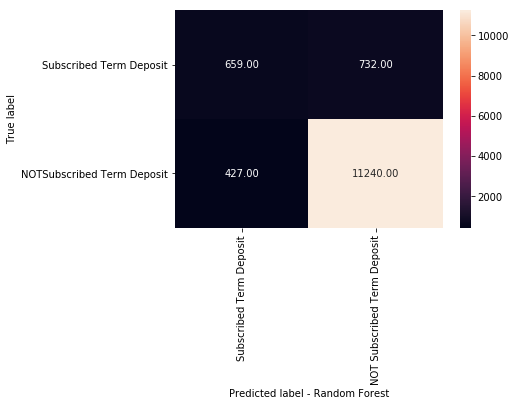

In [76]:
draw_conmmat(y_test,RFpredicted_labels,"Random Forest")

In [77]:
print(classification_report(y_test, RFipredicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     11667
           1       0.52      0.69      0.59      1391

   micro avg       0.90      0.90      0.90     13058
   macro avg       0.74      0.81      0.77     13058
weighted avg       0.91      0.90      0.91     13058



In [78]:
models_df.loc[models_df.shape[0]]=["RandomForest after tuning",RFiscore,rff1]
models_df

,Model,Accuracy,F1Score
0,LRscikitlearn,0.894011,0.275393
1,KNN,0.891254,0.196833
2,Naive Bayes,0.832440,0.39019
3,RandomForest before tuning,0.911242,0.532095
4,RandomForest after tuning,0.899449,0.593876


<font color="blue"><b>Ada Boost</b></font>

In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
default_estimator = LogisticRegression(solver='liblinear')
def do_adaboost(X_trainAB,y_trainAB,X_testAB,y_testAB, baseestimator=default_estimator, lrate=1, nsti=32 ):
    abcl = AdaBoostClassifier( base_estimator = baseestimator,learning_rate=lrate, n_estimators=nsti, random_state=0)
    abcl = abcl.fit(X_trainAB, y_trainAB)

    ABpredict = abcl.predict(X_testAB)
    ABscore = abcl.score(X_testAB , y_testAB)
    return ABscore,ABpredict

In [80]:
ABscore, ABpredicted_labels = do_adaboost(X_train,y_train,X_test,y_test)
print("Score in AdaBoost : ",ABscore)
modelscorecard["AdaBoost"]=ABscore

print("Confusion matrix for Ada Boost : ")
print(y_test.shape,"\n\n",ABpredicted_labels.shape)

Score in AdaBoost :  0.8950068923265431
Confusion matrix for Ada Boost : 
(13058,) 

 (13058,)


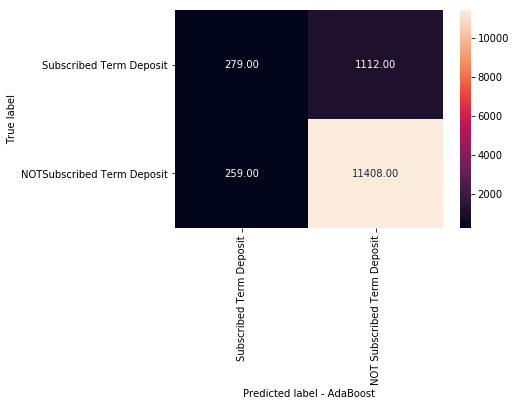

In [81]:
draw_conmmat(y_test,ABpredicted_labels,"AdaBoost")

In [82]:
adab4f1 = f1_score(y_test,ABpredicted_labels)
models_df.loc[models_df.shape[0]]=["AdaBoost before tuning",ABscore,adab4f1]
models_df

,Model,Accuracy,F1Score
0,LRscikitlearn,0.894011,0.275393
1,KNN,0.891254,0.196833
2,Naive Bayes,0.832440,0.39019
3,RandomForest before tuning,0.911242,0.532095
4,RandomForest after tuning,0.899449,0.593876
5,AdaBoost before tuning,0.895007,0.289269


In [83]:
print(classification_report(y_test, ABpredicted_labels))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11667
           1       0.52      0.20      0.29      1391

   micro avg       0.90      0.90      0.90     13058
   macro avg       0.71      0.59      0.62     13058
weighted avg       0.87      0.90      0.87     13058



<font color="red"> Ada boost with LinearRegression classifier as base_estimator not performing well in Clss 1 estimation, i.e., subscribing Term Deposit - F1 score 30% , True positives 1101 </font> <br>
We can try improving by tuning

In [84]:
from sklearn.tree import DecisionTreeClassifier
for i in range(1,5):
    tree_classifier=DecisionTreeClassifier(max_depth=i,random_state=0, class_weight={0:0.5,1:2})
    ABiscore, ABipredicted_labels = do_adaboost(X_train,y_train,X_test,y_test,tree_classifier)
    print("Score in AdaBoost : ",ABiscore)
    print("class 1 widht: ",i,"max depth",i," Score in AdaBoost: ",ABiscore, "F1 score",f1_score(y_test,ABipredicted_labels))

Score in AdaBoost :  0.873181191606678
class 1 widht:  1 max depth 1  Score in AdaBoost:  0.873181191606678 F1 score 0.5311438278595696
Score in AdaBoost :  0.8855107979782508
class 1 widht:  2 max depth 2  Score in AdaBoost:  0.8855107979782508 F1 score 0.5737097234103222
Score in AdaBoost :  0.8864297748506662
class 1 widht:  3 max depth 3  Score in AdaBoost:  0.8864297748506662 F1 score 0.5823711630526612
Score in AdaBoost :  0.8865829376627354
class 1 widht:  4 max depth 4  Score in AdaBoost:  0.8865829376627354 F1 score 0.5696018599244406


In [85]:
from sklearn.model_selection import GridSearchCV #time consuming
from sklearn.model_selection import KFold
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
ada=AdaBoostClassifier()
search_grid={'n_estimators':[16,32,64,128],'learning_rate':[.01,0.1,1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)
print("Best Params: ",search.best_params_)
print("Best score",search.best_score_)

Best Params:  {'learning_rate': 1, 'n_estimators': 128}
Best score 0.9077660342677083


Applying suggested values

In [86]:
tree_classifier=DecisionTreeClassifier(max_depth=3,random_state=0, class_weight={0:0.5,1:2})
ABiscore, ABipredicted_labels = do_adaboost(X_train,y_train,X_test,y_test,tree_classifier,1,nsti=128)
print("Score in AdaBoost : ",ABiscore)
adaf1 = f1_score(y_test,ABipredicted_labels)
print("class 1 widht: ",2,"max depth",i," Score in AdaBoost: ",ABiscore, "F1 score",adaf1)

Score in AdaBoost :  0.88665951906877
class 1 widht:  2 max depth 4  Score in AdaBoost:  0.88665951906877 F1 score 0.5621301775147929


In [87]:
models_df.loc[models_df.shape[0]]=["AdaBoost with DT",ABiscore,adaf1]
models_df

,Model,Accuracy,F1Score
0,LRscikitlearn,0.894011,0.275393
1,KNN,0.891254,0.196833
2,Naive Bayes,0.832440,0.39019
3,RandomForest before tuning,0.911242,0.532095
4,RandomForest after tuning,0.899449,0.593876
5,AdaBoost before tuning,0.895007,0.289269
6,AdaBoost with DT,0.886660,0.56213


<font color="blue"><b>Bagging</b></font>

In [88]:
from sklearn.ensemble import BaggingClassifier

def do_bagging(X_trainBAG,y_trainBAG,X_testBAG,y_testBAG, basemodel):
    bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True, base_estimator = basemodel)
    bgcl = bgcl.fit(X_trainBAG,y_trainBAG)
    BAGpredict = bgcl.predict(X_testBAG)
    BAGscore = bgcl.score(X_testBAG , y_testBAG)
    return BAGscore,BAGpredict

In [89]:
dt = DecisionTreeClassifier()
BAGscore, BAGpredicted_labels = do_bagging(X_train,y_train,X_test,y_test,dt)
print("Score in Bagging : ",BAGscore)
modelscorecard["Bagging"]=BAGscore

print("Confusion matrix for Bagging : ")
print(y_test.shape,"\n\n",BAGpredicted_labels.shape)

Score in Bagging :  0.9072599172920814
Confusion matrix for Bagging : 
(13058,) 

 (13058,)


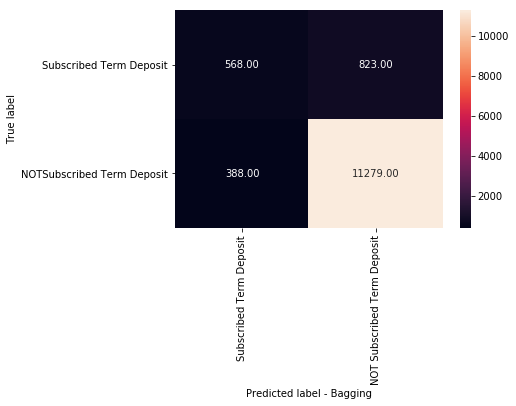

In [90]:
draw_conmmat(y_test,BAGpredicted_labels,"Bagging")

In [91]:
print(classification_report(y_test, BAGpredicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11667
           1       0.59      0.41      0.48      1391

   micro avg       0.91      0.91      0.91     13058
   macro avg       0.76      0.69      0.72     13058
weighted avg       0.90      0.91      0.90     13058



In [92]:
bagb4f1 = f1_score(y_test,BAGpredicted_labels)
models_df.loc[models_df.shape[0]]=["Bagging default",BAGscore,bagb4f1]
models_df

,Model,Accuracy,F1Score
0,LRscikitlearn,0.894011,0.275393
1,KNN,0.891254,0.196833
2,Naive Bayes,0.832440,0.39019
3,RandomForest before tuning,0.911242,0.532095
4,RandomForest after tuning,0.899449,0.593876
5,AdaBoost before tuning,0.895007,0.289269
6,AdaBoost with DT,0.886660,0.56213
7,Bagging default,0.907260,0.484022


In [93]:
from sklearn.model_selection import GridSearchCV #Time consuming
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
dt = DecisionTreeClassifier()
# Define the grid of hyperparameters 'params_dt' 
params_dt = {  
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5,6,7], 
    'max_features': [7,11,13,16],
    'criterion':['gini','entropy']} 
#Scoring Criteria 
#scoring = {'precision': make_scorer(precision_score), 'accuracy': make_scorer(accuracy_score)}
scoring = {'precision': make_scorer(precision_score)}
# Instantiate a 10-fold CV grid search object 'grid_dt' 
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring = scoring, refit='precision',cv=10, n_jobs=-1) 
grid_dt.fit(X_train,y_train)
print("Best Params: ",grid_dt.best_params_)
print("Best score",grid_dt.best_score_)

Best Params:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 4}
Best score 0.672433158299365


<font color="blue">First try : </font>Best Params:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 5}
Best score 0.6635267950456516<br>
<font color="blue">Second try : </font>Best Params:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 1}
Best score 0.6818945829157695

In [94]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=7, min_samples_leaf=4)
BAGscore, BAGpredicted_labels = do_bagging(X_train,y_train,X_test,y_test,dt)
print("Score in Bagging : ",BAGscore)
modelscorecard["Bagging"]=BAGscore

print("Confusion matrix for Bagging : ")
print(y_test.shape,"\n\n",BAGpredicted_labels.shape)

Score in Bagging :  0.9040434982386276
Confusion matrix for Bagging : 
(13058,) 

 (13058,)


In [95]:
bagf1 = f1_score(y_test,BAGpredicted_labels)
models_df.loc[models_df.shape[0]]=["Bagging after tuning",BAGscore,bagf1]
models_df

,Model,Accuracy,F1Score
0,LRscikitlearn,0.894011,0.275393
1,KNN,0.891254,0.196833
2,Naive Bayes,0.832440,0.39019
3,RandomForest before tuning,0.911242,0.532095
4,RandomForest after tuning,0.899449,0.593876
5,AdaBoost before tuning,0.895007,0.289269
6,AdaBoost with DT,0.886660,0.56213
7,Bagging default,0.907260,0.484022
8,Bagging after tuning,0.904043,0.230816


In [96]:
print(classification_report(y_test, BAGpredicted_labels))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     11667
           1       0.79      0.14      0.23      1391

   micro avg       0.90      0.90      0.90     13058
   macro avg       0.85      0.57      0.59     13058
weighted avg       0.89      0.90      0.87     13058



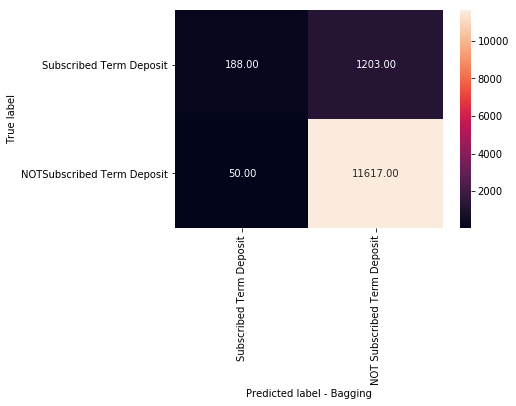

In [97]:
draw_conmmat(y_test,BAGpredicted_labels,"Bagging")

In [98]:
#Bagging fine tuning with Random forest model - where we have fine tuned parameters
#Method : def do_randomforest(X_trainRF,y_trainRF,X_testRF,y_testRF, nsti=20, criterion="entropy", w1=0.5,w2=1, maxdepth=10,minleaf=5):
#Parameters : X_train,y_train,X_test,y_test,32,"entropy",0.5,2,11,6
rfcl = RandomForestClassifier(random_state=0, criterion = 'entropy',n_estimators=32, class_weight={0:0.5,1:1}, max_depth = 11, min_samples_leaf=6)
#Using RandomForest as base estimator
BAGscore, BAGpredicted_labels = do_bagging(X_train,y_train,X_test,y_test,rfcl)
print("Score in Bagging : ",BAGscore)
modelscorecard["Bagging"]=BAGscore

print("Confusion matrix for Bagging : ")
print(y_test.shape,"\n\n",BAGpredicted_labels.shape)
print(classification_report(y_test, BAGpredicted_labels))

Score in Bagging :  0.9116250574360545
Confusion matrix for Bagging : 
(13058,) 

 (13058,)
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11667
           1       0.61      0.46      0.53      1391

   micro avg       0.91      0.91      0.91     13058
   macro avg       0.78      0.71      0.74     13058
weighted avg       0.90      0.91      0.91     13058



In [99]:
bagf1 = f1_score(y_test,BAGpredicted_labels)
models_df.loc[models_df.shape[0]]=["Bagging with Random Forst as base model",BAGscore,bagf1]
models_df

,Model,Accuracy,F1Score
0,LRscikitlearn,0.894011,0.275393
1,KNN,0.891254,0.196833
2,Naive Bayes,0.832440,0.39019
3,RandomForest before tuning,0.911242,0.532095
4,RandomForest after tuning,0.899449,0.593876
5,AdaBoost before tuning,0.895007,0.289269
6,AdaBoost with DT,0.886660,0.56213
7,Bagging default,0.907260,0.484022
8,Bagging after tuning,0.904043,0.230816
9,Bagging with Random Forst as base model,0.911625,0.528209


### <font color="blue"><b>Gradient Boost</b></font>

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)

def do_gradientboost(X_trainGB,y_trainGB,X_testGB,y_testGB):
    gbcl = GradientBoostingClassifier( n_estimators = 50, learning_rate = 0.05)
    gbcl = gbcl.fit(X_trainGB, y_trainGB)
    GBpredict = gbcl.predict(X_testGB)
    GBscore = gbcl.score(X_testGB , y_testGB)
    return GBscore,GBpredict

In [101]:
dt = DecisionTreeClassifier()
GBscore, GBpredicted_labels = do_gradientboost(X_train,y_train,X_test,y_test)
print("Score in Gradient Boost : ",GBscore)
modelscorecard["Gradient Boost"]=GBscore

print("Confusion matrix for Gradient Boost : ")
print(y_test.shape,"\n\n",GBpredicted_labels.shape)

Score in Gradient Boost :  0.905958033389493
Confusion matrix for Gradient Boost : 
(13058,) 

 (13058,)


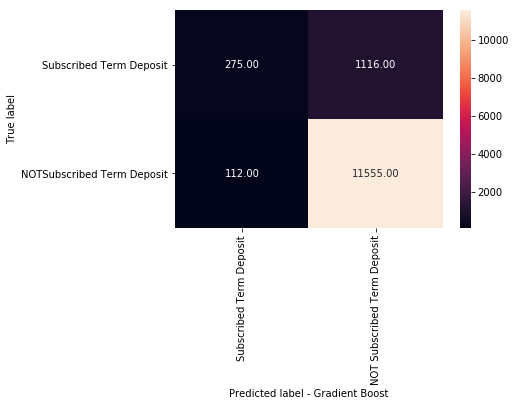

In [102]:
draw_conmmat(y_test,GBpredicted_labels,"Gradient Boost")

In [103]:
print(classification_report(y_test, GBpredicted_labels))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11667
           1       0.71      0.20      0.31      1391

   micro avg       0.91      0.91      0.91     13058
   macro avg       0.81      0.59      0.63     13058
weighted avg       0.89      0.91      0.88     13058



In [104]:
gbb4f1 = f1_score(y_test,GBpredicted_labels)
models_df.loc[models_df.shape[0]]=["GradientBoost default",GBscore,gbb4f1]
models_df

,Model,Accuracy,F1Score
0,LRscikitlearn,0.894011,0.275393
1,KNN,0.891254,0.196833
2,Naive Bayes,0.832440,0.39019
3,RandomForest before tuning,0.911242,0.532095
4,RandomForest after tuning,0.899449,0.593876
5,AdaBoost before tuning,0.895007,0.289269
6,AdaBoost with DT,0.886660,0.56213
7,Bagging default,0.907260,0.484022
8,Bagging after tuning,0.904043,0.230816
9,Bagging with Random Forst as base model,0.911625,0.528209


In [105]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)} #Time consuming
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
print("Gradient Boost Best Params: ",gsearch2.best_params_)
print("Gradient Boost Best score",gsearch2.best_score_)

Gradient Boost Best Params:  {'max_depth': 11, 'min_samples_split': 200}
Gradient Boost Best score 0.9358359109801236


Gradient Boost Best Params:  {'max_depth': 11, 'min_samples_split': 200}
Gradient Boost Best score 0.9358359109801236

In [106]:
param_test3 = {'min_samples_leaf':range(30,71,10), 'max_features':range(5,bank_df.shape[1],2)} #Time consuming
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=11, subsample=0.8, random_state=10, min_samples_split=200), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
print("Gradient Boost Best Params: ",gsearch3.best_params_)
print("Gradient Boost Best score",gsearch3.best_score_)

Gradient Boost Best Params:  {'max_features': 13, 'min_samples_leaf': 40}
Gradient Boost Best score 0.93573399237785


Gradient Boost Best Params:  {'max_features': 13, 'min_samples_leaf': 40}
Gradient Boost Best score 0.93573399237785

In [107]:
#applying fine tuned values
gbcl = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=11, 
                                  subsample=0.8, random_state=10, min_samples_split=200,
                                  max_features=13, min_samples_leaf=40
                                 ) 
gbcl = gbcl.fit(X_train, y_train)
GBpredicted_labels = gbcl.predict(X_test)
GBscore = gbcl.score(X_test , y_test)
# GBscore, GBpredicted_labels = do_gradientboost(X_train,y_train,X_test,y_test)
print("Score in Gradient Boost : ",GBscore)
modelscorecard["Gradient Boost"]=GBscore

print("Confusion matrix for Gradient Boost : ")
print(y_test.shape,"\n\n",GBpredicted_labels.shape)

Score in Gradient Boost :  0.9171389186705468
Confusion matrix for Gradient Boost : 
(13058,) 

 (13058,)


In [108]:
print(classification_report(y_test, GBpredicted_labels))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11667
           1       0.65      0.47      0.55      1391

   micro avg       0.92      0.92      0.92     13058
   macro avg       0.80      0.72      0.75     13058
weighted avg       0.91      0.92      0.91     13058



<h2><font color="#07bdf5">6.Model Comparison</font></h2><br>
<font color="blue">Comparing  the results of ensemble models with the base models</font>

In [109]:
gbb4f1 = f1_score(y_test,GBpredicted_labels)
models_df.loc[models_df.shape[0]]=["GradientBoost after tuning",GBscore,gbb4f1]
models_df

,Model,Accuracy,F1Score
0,LRscikitlearn,0.894011,0.275393
1,KNN,0.891254,0.196833
2,Naive Bayes,0.832440,0.39019
3,RandomForest before tuning,0.911242,0.532095
4,RandomForest after tuning,0.899449,0.593876
5,AdaBoost before tuning,0.895007,0.289269
6,AdaBoost with DT,0.886660,0.56213
7,Bagging default,0.907260,0.484022
8,Bagging after tuning,0.904043,0.230816
9,Bagging with Random Forst as base model,0.911625,0.528209


<font color="blue">
We have considered Accuracy and also F1 score  - as the dataset is more <font color="red">biased towards Not subscribed Term Deposit observations</font><br></font><br>
F1 = 2 * (precision * recall) / (precision + recall)

<font color="blue"><h2>Conclusion: </h2></font>

Model score report with Accuracy and F1 score shows the precision, recall, F1 and support scores for all the classification model we have tried.

Best score we have achieved through:<br>
<font color="blue">Model: </font><font color="red">RandomForest after tuning</font><br>
<font color="blue">Accuracy:</font><font color="red">	89.95%</font><br>
<font color="blue">F1 SCore:</font><font color="red">	59.39%</font><br>

The report shows that  RandomForest model (applied Ensemble Technique) has great predictive power to identify the customers who would not subscribe to the term deposit with 89.95% accuracy. 

However, because of the limited number of clients accepting the term deposit, there is a need for stratified sampling or rebalancing.

<font color="blue">Take away for the business:</font> With the assumption the dataset is correct with respect to all features and observations, the channel throuh which the bank is conducting campaign, may not be effective continuing the same features and observations.
<br>Duration of the call need not be more than 5 min
<br>Number of followup can be restricted to 10
<br>We can predict a new customer <u>not opting for the term deposit</u> with the confidence of about 90% and relatively with low confidence level for the custoer <u>opting for the Term deposit</u>.
<br> 